In [1]:
# imports 
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *


Populating the interactive namespace from numpy and matplotlib


In this notebook we illustrate the effect of exaggerating a distribution. Another nice illustration is made in FIG02, where you see how categorical distributions move over the simplex when exaggerated

In [2]:
# Different distributions
pis = {}
K = 20
m = int(K/2)

pi = np.ones(K)
pis['flat'] = pi/pi.sum()

pi = np.arange(1,K+1)
pis['stair_up'] = pi/pi.sum()

pi = K - np.arange(K)
pis['stair_down'] = pi/pi.sum()

pi = np.ones(K)*0.0001
pi[m:] = 1
pis['upper_half'] = pi/pi.sum()

pi = np.ones(K)*0.0001
pi[:m] = 1
pis['lower_half'] = pi/pi.sum()

pi = np.concatenate((np.arange(1, m+1), (m - np.arange(m))))
pis['peak'] = pi/pi.sum()

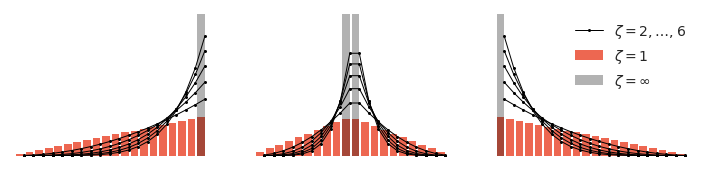

In [3]:
# plot
def amplify(name, zeta, bar=False):
    xs = arange(K)
    alpha = array(pis[name])
    ps = (alpha**zeta)/sum(alpha**zeta)
    if bar:
        l = pyplot.bar(xs-.4, (alpha**zeta)/sum(alpha**zeta), color=maincolor())
    else:
        l, = plot(xs, ps, 'k.-', lw=.5)
    xticks([])
    yticks([])
    xlim(-1,K)
    ylim(0,.35)
    return l

def formatMAPplot(patches):
    for p in patches:
        p.set_alpha(.3)
        p.set_facecolor('k')

def show(name):
    b = amplify(name, 1, True)
    for zeta in zetas:
        l = amplify(name, zeta)

    p = amplify(name, 200, True)
    formatMAPplot(p) 
    return b, l, p

figure(figsize=cm2inch(12,2.5))
zetas = [2, 3, 4, 5, 6]

# Subplots
subplot(131)
show('stair_up')

subplot(132)
show('peak')

subplot(133)
b, l, p = show('stair_down')

# Legend
b[0].set_label('$\zeta=1$')
p[0].set_label('$\zeta=\infty$')
l.set_label('$\zeta=2,\dots, 6$')
legend()

sns.despine(left=True, bottom=True)
subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('FIG03-illustration-zeta.pdf', bbox_inches='tight')